# NB5. Information Cascades

## 1. Network Simulation

A. Simulate a Random Network with N = 50 and p = 5%. Make a visualization of the graph. Make sure your network is connected.

In [3]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from copy import deepcopy
import imageio
from IPython.display import display, Image

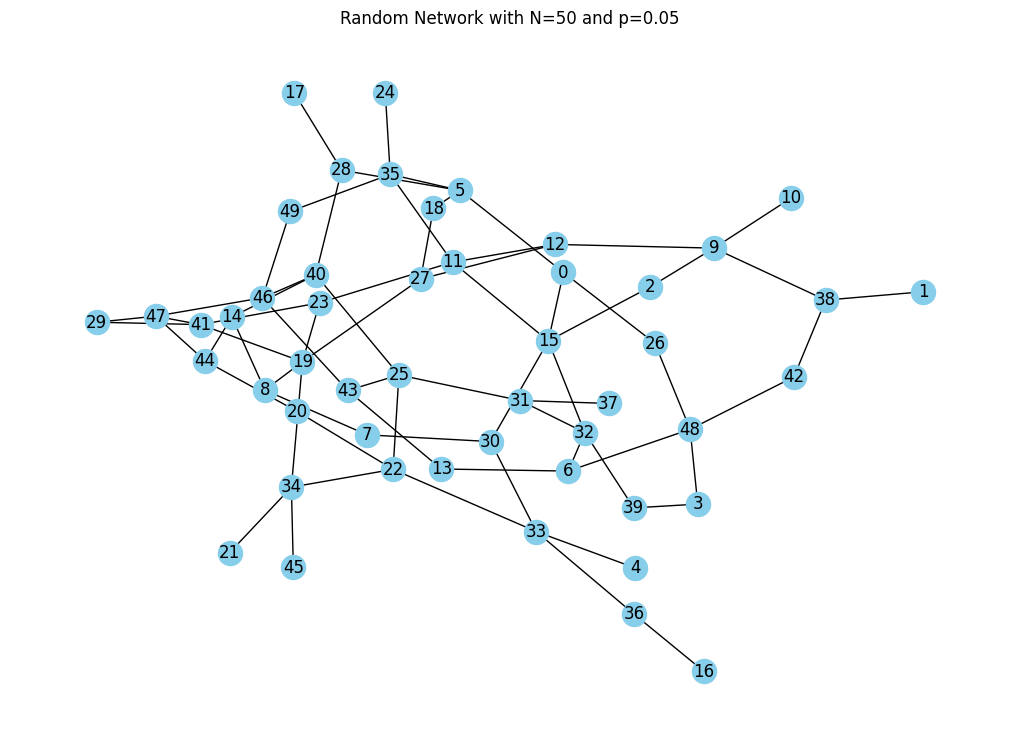

In [4]:
# Parameters for the random network
N = 50
p = 0.05

# Create a connected random network
connected = False
while not connected:
  G = nx.erdos_renyi_graph(N, p)
  connected = nx.is_connected(G)

# Plot the network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_size=300, node_color='skyblue')
plt.title("Random Network with N=50 and p=0.05")
plt.show()

## 2. Fractional Threshold Model
1. Implement an algorithm to simulate the information spread using the fractional threshold model. Consider a synchronous implementation.

2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.

    b) How much nodes are vulnerable nodes?
    
    c) Simulate the information spread with $\theta = \frac{1}{2}$ until no further nodes can be activate. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    d) Create an animation (GIF Image) showing the state of the graph at each step.
    

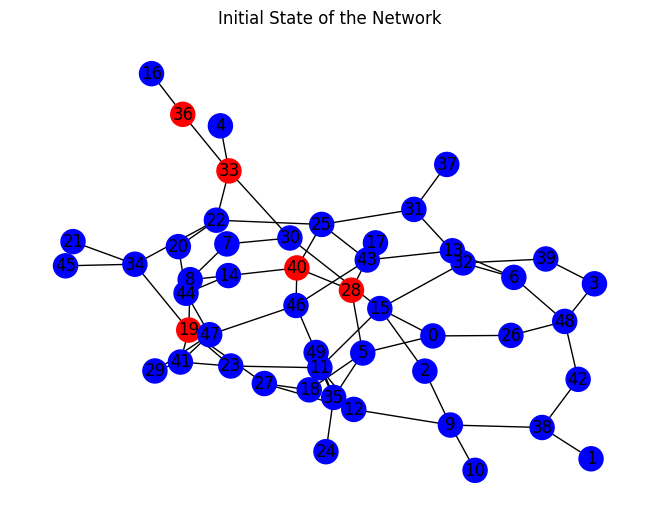

In [5]:
# Point A
# Initializing 'active' nodes
initial_active = random.sample(list(G.nodes()), int(0.1 * G.number_of_nodes()))
nx.set_node_attributes(G, 'Inactive', 'state')
for node in initial_active:
  G.nodes[node]['state'] = 'Active'

# Showing initial state of the network
pos = nx.spring_layout(G, seed=42)
color_map = ['red' if G.nodes[node]['state'] == 'Active' else 'blue' for node in G.nodes()]
nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=300)
plt.title("Initial State of the Network")
plt.show()

In [6]:
# Point B
# Detecting vulnerable nodes
threshold = 0.5
vulnerable_nodes = [node for node in G.nodes() if G.degree[node] > 0 and sum(1 for neighbor in G.neighbors(node) if G.nodes[neighbor]['state']=='Active') / G.degree[node] >= threshold]
print("Vulnerable nodes:", vulnerable_nodes)

Vulnerable nodes: [4, 16, 17, 36]


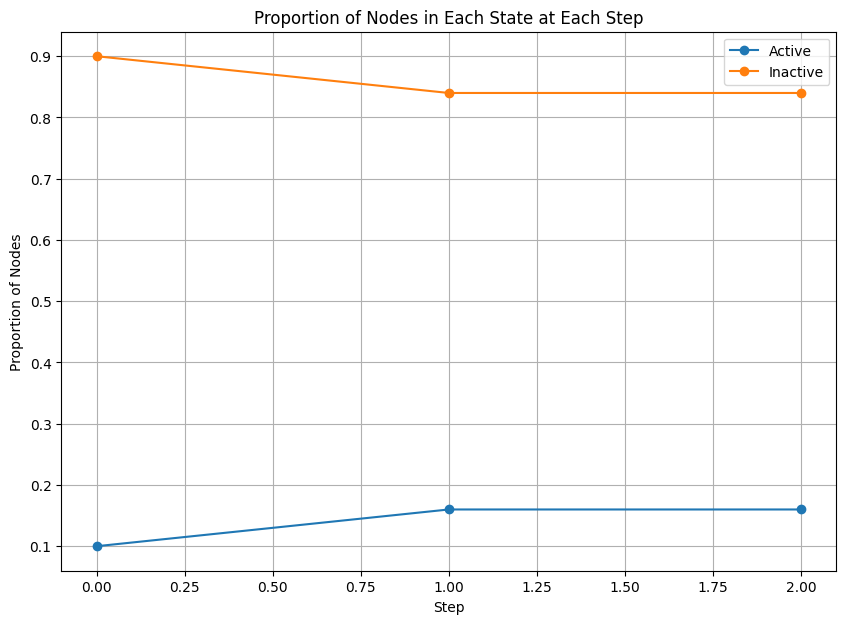

In [7]:
# Point C
# Simulating the information spread

def fractional_threshold_model(G, initial_active, threshold=0.5):
  '''
  Simulate the information spread using the fractional threshold model.

  Parameters:
  - G (network.Graph): Input graph
  - initial_active (list): List of initially active nodes
  - threshold (float): Fractional threshold for activation (default 0.5).

  Returns:
  - steps (list): List of graph states at each step.
  - iterations (int): Number of iterations until no further nodes can be
    activated.
  '''

  # Initialize
  active_nodes = set(initial_active)
  new_active_nodes = set(initial_active)
  steps = [deepcopy(G)]

  for node in G.nodes():
    G.nodes[node]['state'] = 'Active' if node in active_nodes else 'Inactive'

  iterations = 0

  # Iterate
  while new_active_nodes:
    iterations += 1
    new_active_nodes = set()
    for node in G.nodes():
      if node not in active_nodes:
        neighbors = list(G.neighbors(node))
        active_neighbors = sum(1 for neighbor in neighbors if neighbor in active_nodes)
        if active_neighbors / len(neighbors) >= threshold:
          new_active_nodes.add(node)

    for node in new_active_nodes:
      G.nodes[node]['state'] = 'Active'

    active_nodes.update(new_active_nodes)
    steps.append(deepcopy(G))

  return steps, iterations

# Run the fractional threshold model simulation
steps, iterations = fractional_threshold_model(G, initial_active, threshold=0.5)

# Plot the proportion of nodes in each state at each step
proportions_active = []

for step in steps:
  num_active = sum(1 for node in step.nodes() if step.nodes[node]['state'] == 'Active')
  proportions_active.append(num_active / len(step.nodes()))

plt.figure(figsize=(10, 7))
plt.plot(proportions_active, label='Active', marker='o')
plt.plot([1 - prop for prop in proportions_active], label='Inactive', marker = 'o')
plt.xlabel('Step')
plt.ylabel("Proportion of Nodes")
plt.title("Proportion of Nodes in Each State at Each Step")
plt.grid(True)
plt.legend()
plt.show()

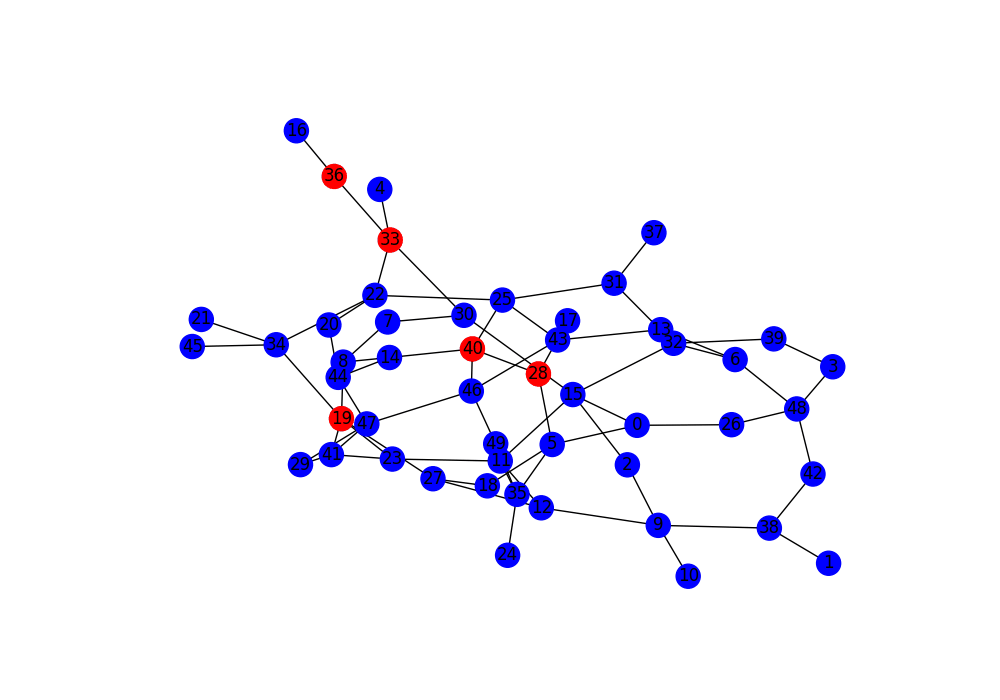

In [8]:
# Point D
# Create an animation (GIF Image) showing the state of the graph at each step

# Position for the layout
pos = nx.spring_layout(G, seed=42)

# Create animation
images = []
for step in steps:
    color_map = ['red' if step.nodes[node]['state'] == 'Active' else 'blue' for node in step.nodes()]
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw(step, pos, node_color=color_map, with_labels=True, ax=ax)

    # Save the figure to an in-memory file
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Create GIF
imageio.mimsave('information_spread.gif', images, fps=1)

# Display the GIF
with open('information_spread.gif', 'rb') as file:
    display(Image(data=file.read(), format='png'))

## 3. Independent Cascade Model

1. Implement an algorithm to simulate the information spread using the a independent cascade model.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
        
    b) Simulate the information until no further nodes can be activate. Consider that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    c) Create an animation (GIF Image) showing the state of the graph at each step.

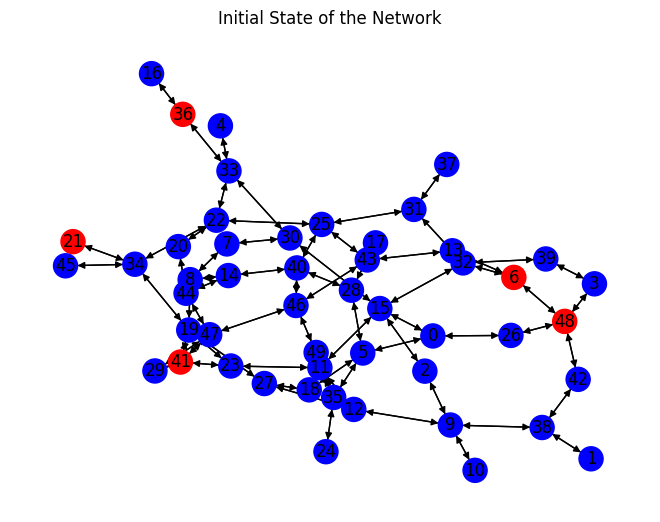

In [9]:
# Point A
# Initializing 'Active' nodes
G_directed = G.to_directed()

initial_active = random.sample(list(G_directed.nodes()), int(0.1 * G_directed.number_of_nodes()))
nx.set_node_attributes(G_directed, 'Inactive', 'state')
for node in initial_active:
  G_directed.nodes[node]['state'] = 'Active'

# Showing initial state of the network
pos = nx.spring_layout(G_directed, seed=42)
color_map = ['red' if G_directed.nodes[node]['state'] == 'Active' else 'blue' for node in G_directed.nodes()]
nx.draw(G_directed, pos, node_color=color_map, with_labels=True, node_size=300)
plt.title("Initial State of the Network")
plt.show()

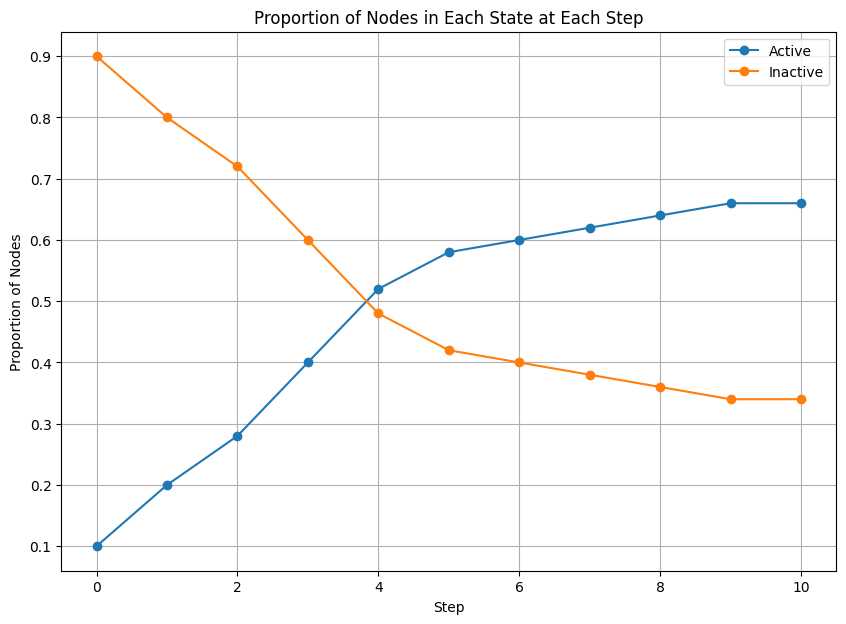

In [10]:
# Point B
# Simulate the information spread

def independent_cascade_model(G, initial_active, P=0.5):
  '''
  Simulate the information spread using the independent cascade model.

  Parameters:
  - G (network.Graph): Input graph
  - initial_active (list): List of initially active nodes
  - P (float): Probability that a node gets activated due to another node.

  Returns:
  - steps (list): List of graph states at each step.
  - iterations (int): Number of iterations until no further nodes can be
    activated.
  '''
  # Initialize
  active_nodes = set(initial_active)
  new_active_nodes = set(initial_active)
  steps = [deepcopy(G)]

  for node in G.nodes():
    G.nodes[node]['state'] = 'Active' if node in active_nodes else 'Inactive'

  iterations = 0

  # Iterate
  while new_active_nodes:
    iterations += 1
    current_active_nodes = new_active_nodes
    new_active_nodes = set()

    for node in current_active_nodes:
      for neighbor in G.successors(node):
        if G.nodes[neighbor]['state'] == 'Inactive':
          prob = P if isinstance(P, float) else P.get((node, neighbor), 0)
          if random.random() < prob:
            new_active_nodes.add(neighbor)

    for node in new_active_nodes:
      G.nodes[node]['state'] = 'Active'

    active_nodes.update(new_active_nodes)
    steps.append(deepcopy(G))

  return steps, iterations


# Run the independent cascade model simulation
steps, iterations = independent_cascade_model(G_directed, initial_active, P=0.5)

# Plot the proportion of nodes in each state at each step
proportions_active = []

for step in steps:
  num_active = sum(1 for node in step.nodes() if step.nodes[node]['state'] == 'Active')
  proportions_active.append(num_active / len(step.nodes()))

plt.figure(figsize=(10, 7))
plt.plot(proportions_active, label='Active', marker='o')
plt.plot([1 - prop for prop in proportions_active], label='Inactive', marker = 'o')
plt.xlabel('Step')
plt.ylabel("Proportion of Nodes")
plt.title("Proportion of Nodes in Each State at Each Step")
plt.grid(True)
plt.legend()
plt.show()

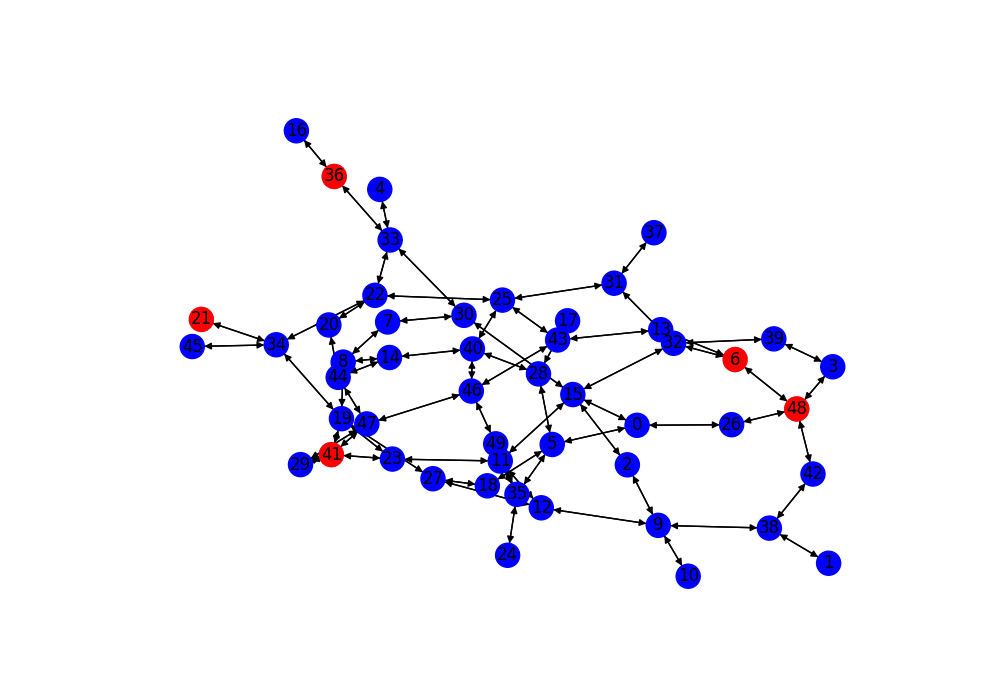

In [11]:
# Point C
# Create an animation (GIF Image) showing the state of the graph at each step

# Position for the layout
pos = nx.spring_layout(G_directed, seed=42)

# Create animation
images = []
for step in steps:
    color_map = ['red' if step.nodes[node]['state'] == 'Active' else 'blue' for node in step.nodes()]
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw(step, pos, node_color=color_map, with_labels=True, ax=ax)

    # Save the figure to an in-memory file
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Create GIF
imageio.mimsave('information_spread.gif', images, fps=1)

# Display the GIF
with open('information_spread.gif', 'rb') as file:
    display(Image(data=file.read(), format='png'))

## 4. Maximazing the Information Spread

1. Implement the algorithm to find the set S with size k that maximize the information spread based on the Greedy Algorithm proposed by Kempe (2003).
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network.

In [12]:
def estimate_spread(G, S, P=0.5, num_simulations=100):
  '''
  Estimate the spread of influence for a given seed set using multiple simulations.

  Parameters:
  - G (networkx.DiGraph): Input directed graph
  - S (set): Set of initially activated nodes (seed set)
  - P (float): Probabiity of activation for neighbors (default 0.5)
  - num_simulations (int): Number of simulations to run (default 100)

  Returns:
  - average_spread (float): Average number of activated nodes
  '''
  total_activated = 0
  for _ in range(num_simulations):
    steps, _ = independent_cascade_model(G, S, P)
    activated_nodes = set(node for step in steps for node in G if G.nodes[node]['state']=='Active')
    total_activated += len(activated_nodes)

  return total_activated / num_simulations

def greedy_algorithm(G, k, P=0.5, num_simulations=100):
  '''
  Find the seed set with size k that maximizes the influence using the Greedy
  Algorithm.

  Parameters:
  - G (networkx.DiGraph): Input directed graph
  - k (int): Size of the seed set
  - P (float): Probability of activation for neighbors (default 0.5)
  - num_simulations (int): Number of simulations to estimate the spread (default 100)

  Returns:
  - S (set): Seed set of size k that maximizes the influence
  '''
  S = set()
  for _ in range(k):
    best_node = None
    best_spread = 0
    for node in G.nodes():
      if node not in S:
        current_spread = estimate_spread(G, S | {node}, P, num_simulations)
        if current_spread > best_spread:
          best_spread = current_spread
          best_node = node
    S.add(best_node)
  return S

In [13]:
# Find the optimal seed set using the greedy algorithm
k = 10
seed_set = greedy_algorithm(G_directed, k)
print(f"Optimal seed set of size {k}: {seed_set}")

Optimal seed set of size 10: {33, 1, 3, 9, 11, 14, 47, 21, 25, 27}


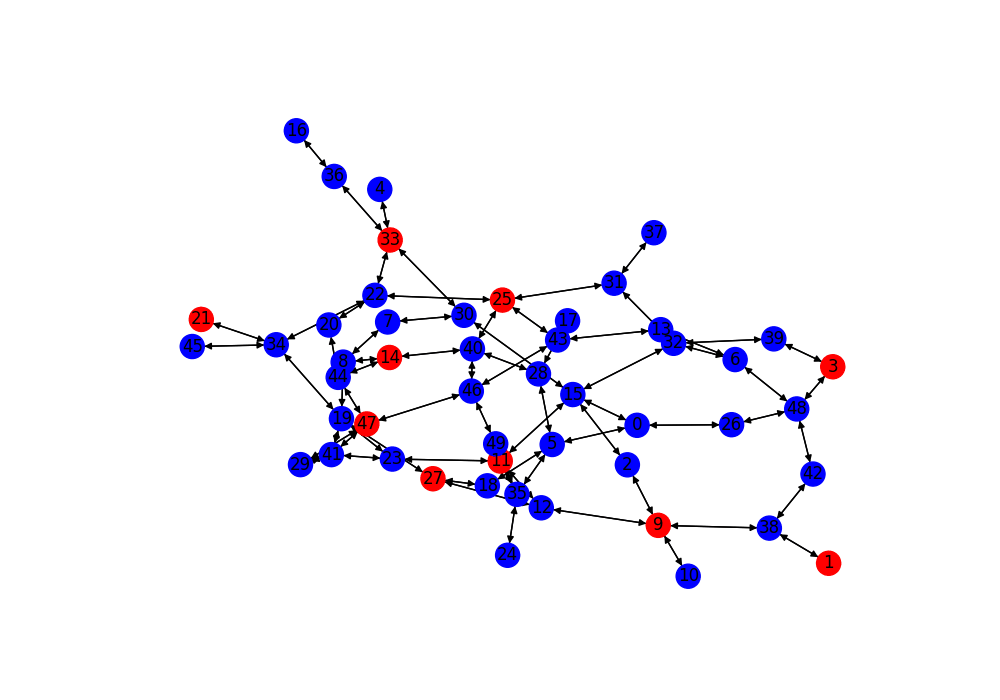

In [14]:
# Showing a simulation using those nodes
nx.set_node_attributes(G_directed, 'Inactive', 'state')
for node in seed_set:
  G_directed.nodes[node]['state'] = 'Active'

# Capture the spread process
steps, iterations = independent_cascade_model(G_directed, seed_set, P=0.5)

# Position for the layout (fixed)
pos = nx.spring_layout(G_directed, seed=42)

# Create animation
images = []
for step in steps:
    color_map = ['red' if step.nodes[node]['state'] == 'Active' else 'blue' for node in step.nodes()]
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw(step, pos, node_color=color_map, with_labels=True, ax=ax)

    # Save the figure to an in-memory file
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Create GIF
imageio.mimsave('information_spread.gif', images, fps=1)

# Display the GIF
with open('information_spread.gif', 'rb') as file:
    display(Image(data=file.read(), format='png'))

## 5. Wrapping all together

1. Simulate an Erdos-Renyi and a Barabasi-Albert Network with 50 nodes and 150 nodes. Make a visualization of each network.
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account the following hypotesis:
    * Hypotesis 1: The probability $P_{v,w}$, i. e. probability that node w gets activated due to w, is given by a constant P = 0.5 for any node in the network.
    * Hypotesis 2: Now, take into account that $P_{v,w}$ is given by the Node Similarity. Let $N(v_v)$ and $N(v_w)$ be the neighbors of vertices $v_v$ and $v_w$, respectively. The Jaccard Node Similarity between both nodes is given by:
$$\sigma_{Jaccard}(v_v, v_w) = \frac{|N(v_v) \cap N(v_w)|}{|N(v_v) \cup N(v_w)|}$$


In general, the definition of neighborhood $N(v_i)$ excludes the node itself $(v_i)$. This, however, leads to problems with similarity values because nodes that are connected and do not share a neighbor will be assigned zero similarity. This can be rectified by assuming that nodes are included in their own neighborhood.

> Note: You need to complete one simulation per hypotesis.

In [23]:
#  Calculate Jaccard Similarity
def calculate_jaccard_similarity(G):
    """
    Calculate the Jaccard similarity for all pairs of nodes in the graph.

    Parameters:
    - G (network.DiGraph): Input graph

    Returns:
    - P (dict): Dictionary where keys are (node1, node2) tuples and values are Jaccard similarity scores.
    """
    P = {}
    for u in G.nodes():
        neighbors_u = set(G.neighbors(u)) | {u}
        for v in G.nodes():
            if u != v:
              neighbors_v = set(G.neighbors(v)) | {v}
              intersection = neighbors_u & neighbors_v
              union = neighbors_u | neighbors_v
              P[(u, v)] = len(intersection) / len(union) if len(union) > 0 else 0
    return P

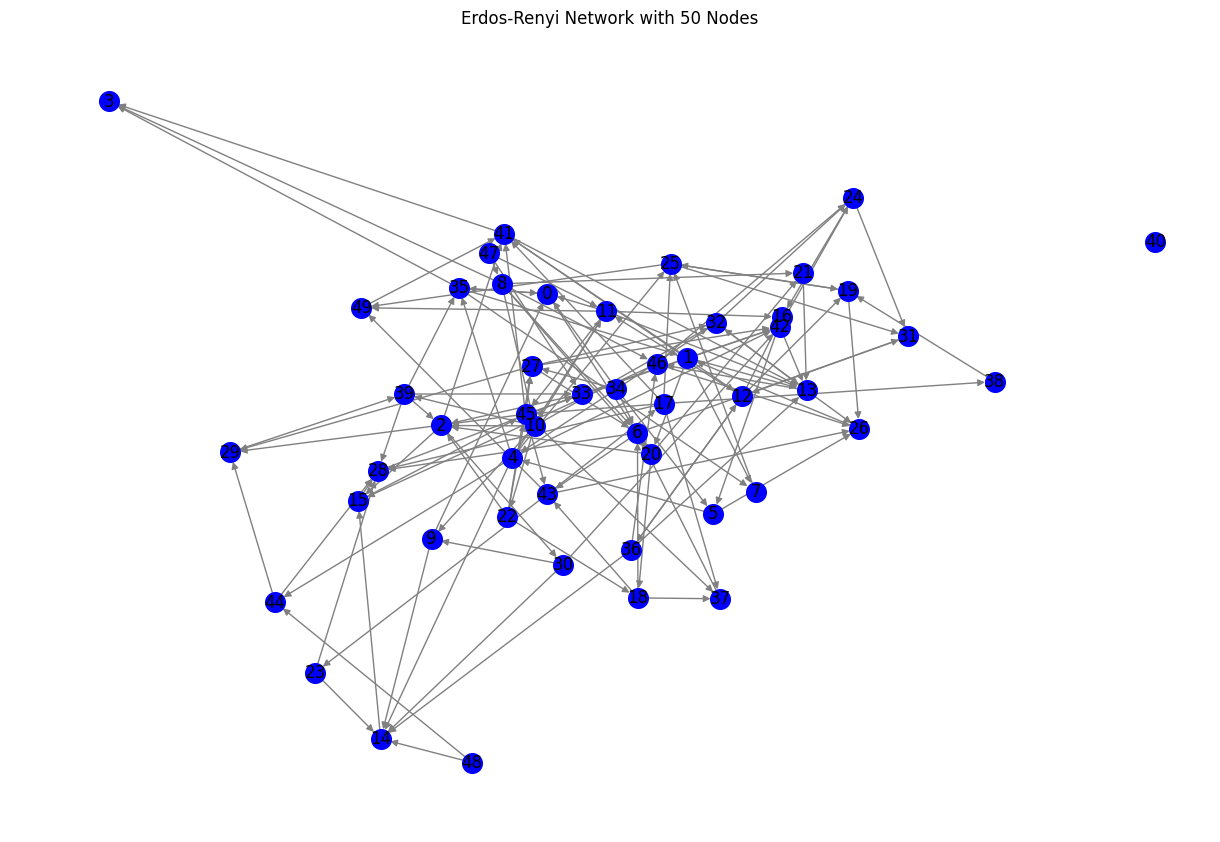

In [24]:
# Erdos-Renyi with 50 nodes
G_er_50 = nx.gnp_random_graph(50, 0.05, directed=True)

pos = nx.spring_layout(G_er_50, seed=42, k=0.3)
plt.figure(figsize=(12, 8))
nx.draw(G_er_50, pos, node_color='blue', with_labels=True, node_size=200, edge_color='gray')
plt.title('Erdos-Renyi Network with 50 Nodes')
plt.show()

Erdos-Renyi 50 nodes (Hypothesis 1): {34, 4, 36, 38, 8, 10, 47, 48, 17, 18}


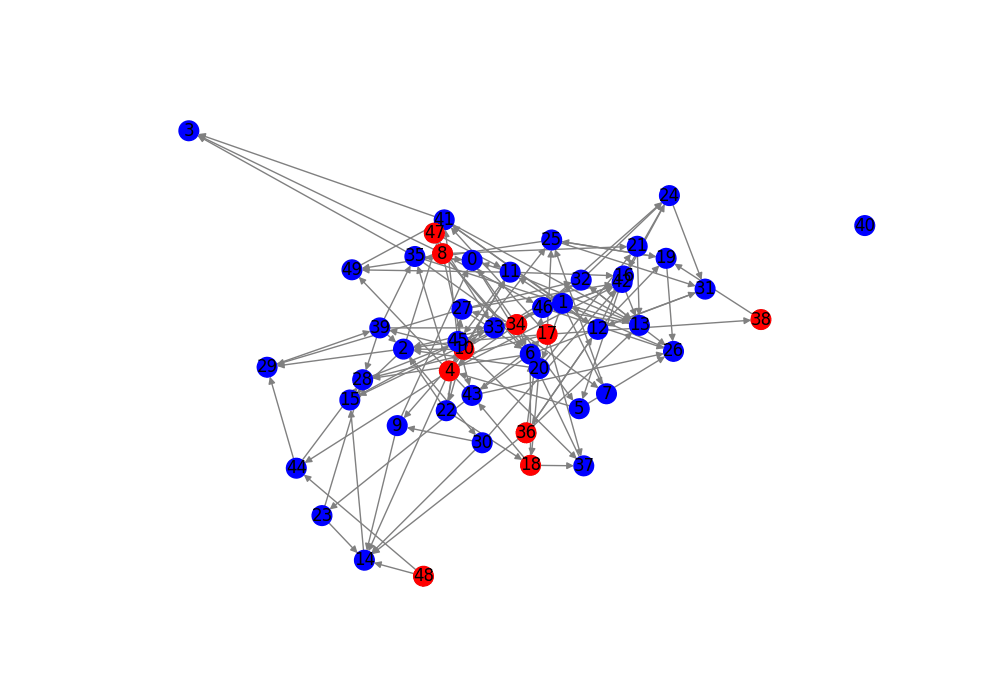

In [25]:
# Hypothesis 1
k = 10
seed_set_er_50_h1 = greedy_algorithm(G_er_50, k)

print(f"Erdos-Renyi 50 nodes (Hypothesis 1): {seed_set_er_50_h1}")

# Showing a simulation using those nodes
nx.set_node_attributes(G_er_50, 'Inactive', 'state')
for node in seed_set_er_50_h1:
  G_er_50.nodes[node]['state'] = 'Active'

# Capture the spread process
steps, iterations = independent_cascade_model(G_er_50, seed_set_er_50_h1, P=0.5)

# Position for the layout (fixed)
pos = nx.spring_layout(G_er_50, seed=42, k=0.3)

# Create animation
images = []
for step in steps:
    color_map = ['red' if step.nodes[node]['state'] == 'Active' else 'blue' for node in step.nodes()]
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw(step, pos, node_color=color_map, with_labels=True, ax=ax, node_size=200, edge_color='gray')

    # Save the figure to an in-memory file
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Create GIF
imageio.mimsave('information_spread.gif', images, fps=1)

# Display the GIF
with open('information_spread.gif', 'rb') as file:
    display(Image(data=file.read(), format='png'))

Erdos-Renyi 50 nodes (Hypothesis 2): {4, 39, 8, 41, 10, 12, 13, 17, 18, 30}


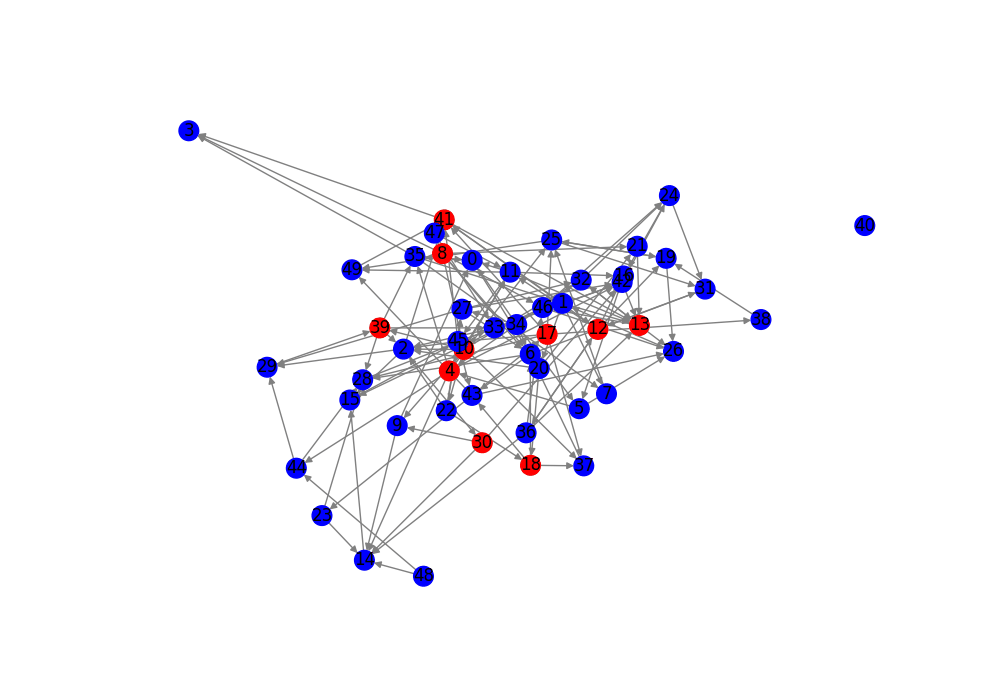

In [27]:
# Hypothesis 2
k = 10
P = calculate_jaccard_similarity(G_er_50)
seed_set_er_50_h2 = greedy_algorithm(G_er_50, k, P=P)

print(f"Erdos-Renyi 50 nodes (Hypothesis 2): {seed_set_er_50_h2}")

# Showing a simulation using those nodes
nx.set_node_attributes(G_er_50, 'Inactive', 'state')
for node in seed_set_er_50_h2:
  G_er_50.nodes[node]['state'] = 'Active'

# Capture the spread process
steps, iterations = independent_cascade_model(G_er_50, seed_set_er_50_h2, P=P)

# Position for the layout (fixed)
pos = nx.spring_layout(G_er_50, seed=42, k=0.3)

# Create animation
images = []
for step in steps:
    color_map = ['red' if step.nodes[node]['state'] == 'Active' else 'blue' for node in step.nodes()]
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw(step, pos, node_color=color_map, with_labels=True, ax=ax, node_size=200, edge_color='gray')

    # Save the figure to an in-memory file
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Create GIF
imageio.mimsave('information_spread.gif', images, fps=1)

# Display the GIF
with open('information_spread.gif', 'rb') as file:
    display(Image(data=file.read(), format='png'))

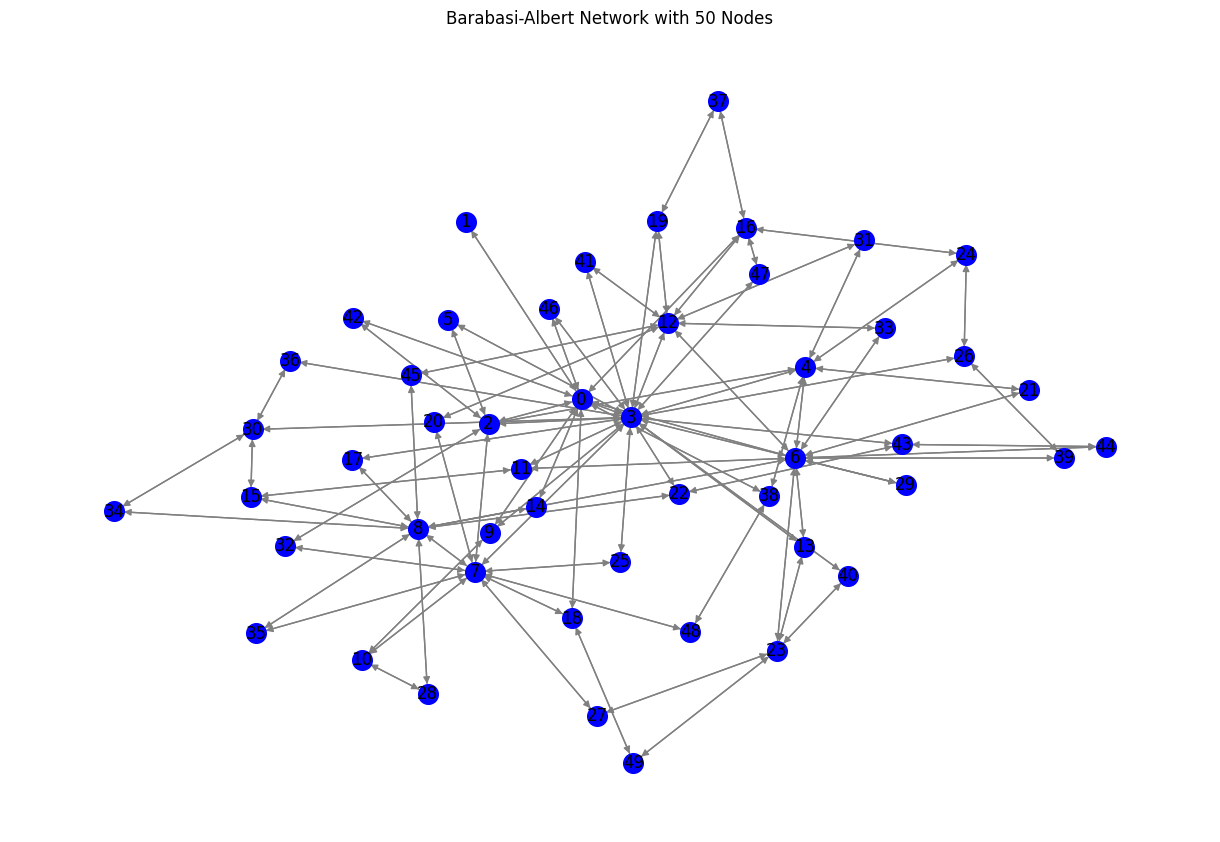

In [43]:
# Barabasi-Albert with 50 nodes
G_ba_50 = nx.barabasi_albert_graph(50, 2).to_directed()

pos = nx.spring_layout(G_ba_50, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(G_ba_50, pos, node_color='blue', with_labels=True, node_size=200, edge_color='gray')
plt.title('Barabasi-Albert Network with 50 Nodes')
plt.show()

Barabasi-Albert 50 nodes (Hypothesis 1): {1, 35, 37, 6, 8, 10, 44, 46, 15, 23}


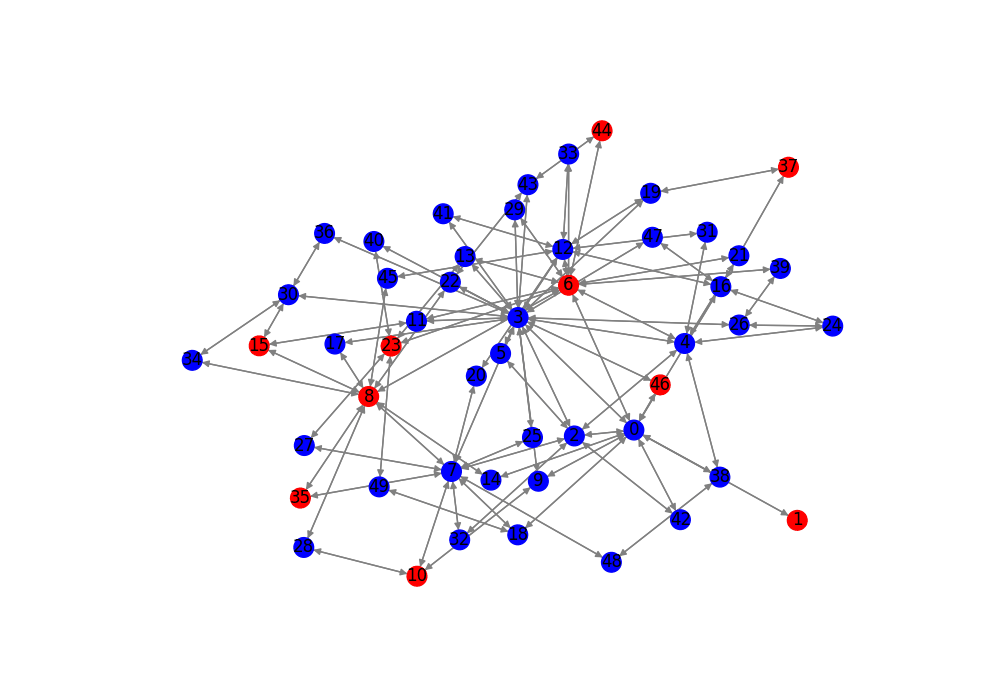

In [44]:
# Hypothesis 1
k = 10
seed_set_ba_50_h1 = greedy_algorithm(G_ba_50, k, num_simulations=100)

print(f"Barabasi-Albert 50 nodes (Hypothesis 1): {seed_set_ba_50_h1}")

# Showing a simulation using those nodes
nx.set_node_attributes(G_ba_50, 'Inactive', 'state')
for node in seed_set_ba_50_h1:
  G_ba_50.nodes[node]['state'] = 'Active'

# Capture the spread process
steps, iterations = independent_cascade_model(G_ba_50, seed_set_ba_50_h1, P=0.5)

# Position for the layout (fixed)
pos = nx.spring_layout(G_ba_50, seed=42, k=0.3)

# Create animation
images = []
for step in steps:
    color_map = ['red' if step.nodes[node]['state'] == 'Active' else 'blue' for node in step.nodes()]
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw(step, pos, node_color=color_map, with_labels=True, ax=ax, node_size=200, edge_color='gray')

    # Save the figure to an in-memory file
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Create GIF
imageio.mimsave('information_spread.gif', images, fps=1)

# Display the GIF
with open('information_spread.gif', 'rb') as file:
    display(Image(data=file.read(), format='png'))

Erdos-Renyi 50 nodes (Hypothesis 2): {3, 36, 6, 7, 8, 38, 46, 16, 23, 26}


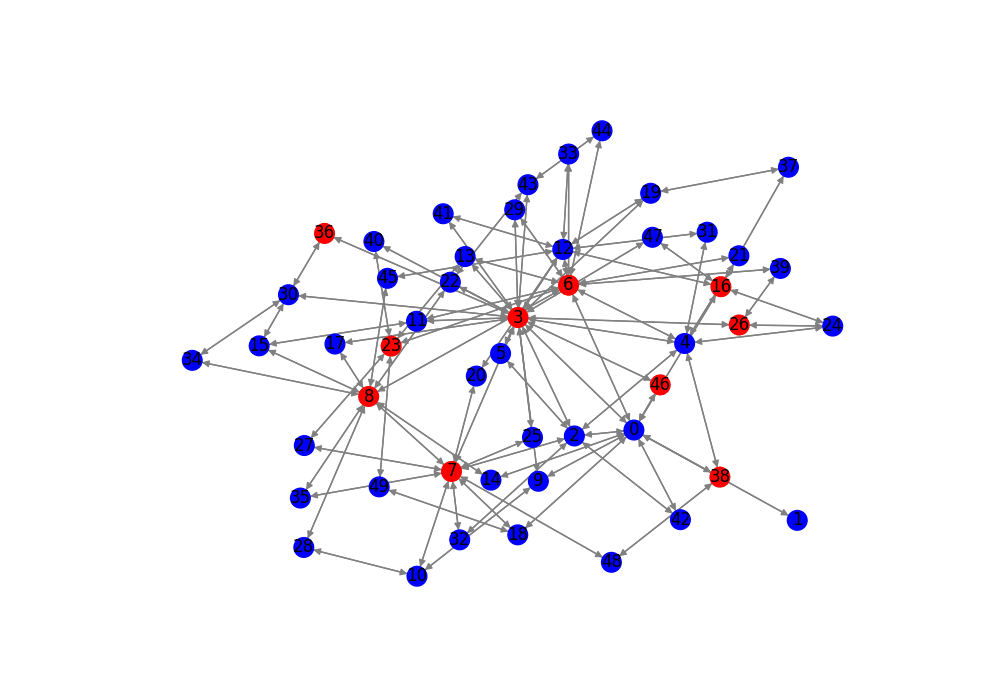

In [45]:
# Hypothesis 2
k = 10
P = calculate_jaccard_similarity(G_ba_50)
seed_set_ba_50_h2 = greedy_algorithm(G_ba_50, k, P=P)

print(f"Erdos-Renyi 50 nodes (Hypothesis 2): {seed_set_ba_50_h2}")

# Showing a simulation using those nodes
nx.set_node_attributes(G_ba_50, 'Inactive', 'state')
for node in seed_set_ba_50_h2:
  G_ba_50.nodes[node]['state'] = 'Active'

# Capture the spread process
steps, iterations = independent_cascade_model(G_ba_50, seed_set_ba_50_h2, P=P)

# Position for the layout (fixed)
pos = nx.spring_layout(G_ba_50, seed=42, k=0.3)

# Create animation
images = []
for step in steps:
    color_map = ['red' if step.nodes[node]['state'] == 'Active' else 'blue' for node in step.nodes()]
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw(step, pos, node_color=color_map, with_labels=True, ax=ax, node_size=200, edge_color='gray')

    # Save the figure to an in-memory file
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Create GIF
imageio.mimsave('information_spread.gif', images, fps=1)

# Display the GIF
with open('information_spread.gif', 'rb') as file:
    display(Image(data=file.read(), format='png'))